In [68]:
import pandas as pd
import requests
import time
from base64 import b64encode
from pprint import pprint 
import numpy as np
import matplotlib.pyplot as plt
from os.path import join #I do not know what this is used by but I am adding it just incase
import math as math
from collections import Counter
import seaborn as sn

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [30]:
# Your Spotify API credentials
client_id = '6567e17677764bb980fe558a7608ebac'
client_secret = '310efeba56ba4c70a2fc910e9fd7c64a'

# Spotify API endpoints
token_url = 'https://accounts.spotify.com/api/token'

# Base64 encode the client ID and client secret
credentials = b64encode(f'{client_id}:{client_secret}'.encode('utf-8')).decode('utf-8')

# Request parameters
token_data = {
    'grant_type': 'client_credentials',  # Use 'client_credentials' for client credentials flow
}

# Request headers
token_headers = {
    'Authorization': f'Basic {credentials}',
}

# Make the request to obtain the access token
response = requests.post(token_url, data=token_data, headers=token_headers)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Parse the JSON response
    token_info = response.json()
    pprint(token_info)
    # Extract the access token from the response
    access_token = token_info['access_token']
    
    print(f'Access Token: {access_token}')
else:
    print(f'Error: {response.status_code}, {response.text}')


{'access_token': 'BQAs46nFDdCTj-5IH0VDwEuNhLClOoikph8_lZnR6lv0yAaKD7LHDuc8NGyZxPrSnzmNt-1qz1QK2HsDN2O73Tu4dOWgLhyQ6lLE6KefZVdd-Hkgsas',
 'expires_in': 3600,
 'token_type': 'Bearer'}
Access Token: BQAs46nFDdCTj-5IH0VDwEuNhLClOoikph8_lZnR6lv0yAaKD7LHDuc8NGyZxPrSnzmNt-1qz1QK2HsDN2O73Tu4dOWgLhyQ6lLE6KefZVdd-Hkgsas


In [31]:
playlist_id = '3Vl4w9fio6TBE1tSAMvRrD'
BASE_URL = 'https://api.spotify.com/v1/'
playlist_url = f'{BASE_URL}playlists/{playlist_id}/tracks'


# Request headers with the access token
headers = {
    'Authorization': f'Bearer {access_token}',
}

# Make the GET request
response = requests.get(playlist_url, headers=headers)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Parse and pprint the JSON response
    playlists_data = response.json()
    pprint(playlists_data)
else:
    print(f'Error: {response.status_code}, {response.text}')

{'href': 'https://api.spotify.com/v1/playlists/3Vl4w9fio6TBE1tSAMvRrD/tracks?offset=0&limit=100',
 'items': [{'added_at': '2021-10-22T18:25:46Z',
            'added_by': {'external_urls': {'spotify': 'https://open.spotify.com/user/18n4wqgq3mkzhcyd5qq8h4gqy'},
                         'href': 'https://api.spotify.com/v1/users/18n4wqgq3mkzhcyd5qq8h4gqy',
                         'id': '18n4wqgq3mkzhcyd5qq8h4gqy',
                         'type': 'user',
                         'uri': 'spotify:user:18n4wqgq3mkzhcyd5qq8h4gqy'},
            'is_local': False,
            'primary_color': None,
            'track': {'album': {'album_type': 'single',
                                'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/2cFrymmkijnjDg9SS92EPM'},
                                             'href': 'https://api.spotify.com/v1/artists/2cFrymmkijnjDg9SS92EPM',
                                             'id': '2cFrymmkijnjDg9SS92EPM',
                       

In [51]:
# Lists to store information
tracks_info = []
audio_features = []

# Request headers with the access token
headers = {
    'Authorization': f'Bearer {access_token}',
}

# Loop through each track in the playlist data
for playlist_track in playlists_data['items']:
    track_data = playlist_track['track']
    track_name = track_data['name']

    # Extracting track name without parentheses
    trim_name = track_name.split('(')[0].strip()

    # Use upper() to standardize
    standardized_name = trim_name.upper()


    # Request additional information about the track
    track_info_response = requests.get(BASE_URL + 'tracks/' + track_data['id'], headers=headers)
    track_info_data = track_info_response.json()

    # Append track information to the list
    tracks_info.append(track_info_data)

    # Request audio features for the track
    audio_features_response = requests.get(BASE_URL + 'audio-features/' + track_data['id'], headers=headers)
    audio_features_data = audio_features_response.json()

    # Append audio features to the list
    audio_features.append(audio_features_data)

    # Print progress information
    print(f"Processed: {standardized_name}")

Processed: U LOVE U
Processed: WICKED GAME
Processed: ON OUR KNEES
Processed: THE LOSER
Processed: GOOD DAYS
Processed: ARE YOU BORED YET?
Processed: WHERE'S MY LOVE
Processed: DARK RED
Processed: SLIP
Processed: THE BEACH
Processed: PUT IT ON ME
Processed: TO BUILD A HOME
Processed: HEARTBREAK ANNIVERSARY
Processed: HOPELESSLY DEVOTED TO YOU - FROM “GREASE”
Processed: CRAZY
Processed: EVERYTHING I WANTED
Processed: CARELESS WHISPER
Processed: FEMME LIKE U - J
Processed: YOUR POWER
Processed: DANCING WITH YOUR GHOST
Processed: QUAND C'EST ?
Processed: ANOTHER LOVE
Processed: CREEP
Processed: STILL DON'T KNOW MY NAME
Processed: BORED
Processed: WHEN I R.I.P.
Processed: SLOW DANCING IN THE DARK
Processed: IN THIS SHIRT
Processed: THE NIGHT WE MET
Processed: REMEMBRANCE
Processed: LISTEN BEFORE I GO
Processed: EXPERIENCE
Processed: MY FUTURE
Processed: YOU BROKE ME FIRST
Processed: BREAK MY HEART AGAIN
Processed: EVERYBODY DIES
Processed: OUT OF LOVE
Processed: I'M NOT ANGRY ANYMORE
Proce

In [57]:
trackinfo_df = pd.DataFrame(tracks_info)
trackinfo_df.head()


,album,artists,available_markets,disc_number,duration_ms,explicit,external_ids,external_urls,href,id,is_local,name,popularity,preview_url,track_number,type,uri
0,"{'album_type': 'single', 'artists': [{'externa...",[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,188986,True,{'isrc': 'USUG12102378'},{'spotify': 'https://open.spotify.com/track/0E...,https://api.spotify.com/v1/tracks/0EFuHbkuin3p...,0EFuHbkuin3pM6byX7VlGI,False,u love u,44,https://p.scdn.co/mp3-preview/5f2bf9ad832b5d0e...,3,track,spotify:track:0EFuHbkuin3pM6byX7VlGI
1,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AR, AT, BE, BO, BR, BG, CA, CL, CO, CR, CY, C...",1,289066,False,{'isrc': 'USRE19900989'},{'spotify': 'https://open.spotify.com/track/7w...,https://api.spotify.com/v1/tracks/7w5AOd6HrDIH...,7w5AOd6HrDIHewHfpABEss,False,Wicked Game,82,None,5,track,spotify:track:7w5AOd6HrDIHewHfpABEss
2,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,277493,False,{'isrc': 'BEDY11500005'},{'spotify': 'https://open.spotify.com/track/2H...,https://api.spotify.com/v1/tracks/2HCgcgN4PA0x...,2HCgcgN4PA0xr2ZqtsBpPb,False,On Our Knees (feat. R.O),51,https://p.scdn.co/mp3-preview/fba1eea445187a72...,4,track,spotify:track:2HCgcgN4PA0xr2ZqtsBpPb
3,"{'album_type': 'single', 'artists': [{'externa...",[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,131586,False,{'isrc': 'QM2PV1667140'},{'spotify': 'https://open.spotify.com/track/0y...,https://api.spotify.com/v1/tracks/0yTGQpPOgcsS...,0yTGQpPOgcsS8Xqp5bQO58,False,The Loser,69,None,1,track,spotify:track:0yTGQpPOgcsS8Xqp5bQO58
4,"{'album_type': 'single', 'artists': [{'externa...",[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,279204,True,{'isrc': 'USRC12004189'},{'spotify': 'https://open.spotify.com/track/3Y...,https://api.spotify.com/v1/tracks/3YJJjQPAbDT7...,3YJJjQPAbDT7mGpX3WtQ9A,False,Good Days,81,https://p.scdn.co/mp3-preview/ddda59aa9a028820...,1,track,spotify:track:3YJJjQPAbDT7mGpX3WtQ9A


In [58]:
audiofeatures_df= pd.DataFrame(audio_features)
audiofeatures_df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.533,0.694,4,-5.634,0,0.0413,0.0197,0.000000,0.1590,0.292,80.016,audio_features,0EFuHbkuin3pM6byX7VlGI,spotify:track:0EFuHbkuin3pM6byX7VlGI,https://api.spotify.com/v1/tracks/0EFuHbkuin3p...,https://api.spotify.com/v1/audio-analysis/0EFu...,188986,4
1,0.663,0.296,9,-18.090,1,0.0294,0.6800,0.008370,0.0879,0.359,112.306,audio_features,7w5AOd6HrDIHewHfpABEss,spotify:track:7w5AOd6HrDIHewHfpABEss,https://api.spotify.com/v1/tracks/7w5AOd6HrDIH...,https://api.spotify.com/v1/audio-analysis/7w5A...,289067,4
2,0.592,0.341,1,-9.914,0,0.0326,0.8550,0.032400,0.2840,0.266,86.958,audio_features,2HCgcgN4PA0xr2ZqtsBpPb,spotify:track:2HCgcgN4PA0xr2ZqtsBpPb,https://api.spotify.com/v1/tracks/2HCgcgN4PA0x...,https://api.spotify.com/v1/audio-analysis/2HCg...,277493,4
3,0.748,0.297,1,-10.613,1,0.1320,0.4850,0.270000,0.1380,0.114,123.983,audio_features,0yTGQpPOgcsS8Xqp5bQO58,spotify:track:0yTGQpPOgcsS8Xqp5bQO58,https://api.spotify.com/v1/tracks/0yTGQpPOgcsS...,https://api.spotify.com/v1/audio-analysis/0yTG...,131587,4
4,0.436,0.655,1,-8.370,0,0.0583,0.4990,0.000008,0.6880,0.412,121.002,audio_features,3YJJjQPAbDT7mGpX3WtQ9A,spotify:track:3YJJjQPAbDT7mGpX3WtQ9A,https://api.spotify.com/v1/tracks/3YJJjQPAbDT7...,https://api.spotify.com/v1/audio-analysis/3YJJ...,279204,4


In [59]:
df = pd.merge(trackinfo_df, audiofeatures_df, on='id')

In [60]:
df['duration'] = pd.to_datetime(df['duration_ms_x'], unit='ms').dt.strftime('%H:%M:%S')

In [61]:
df = df[['album','artists', 'disc_number', 'duration', 'explicit', 'is_local', 'name', 'popularity','track_number','danceability','energy','key','loudness','mode','speechiness','acousticness','instrumentalness','liveness','valence','tempo','time_signature']]
df.head()

,album,artists,disc_number,duration,explicit,is_local,name,popularity,track_number,danceability,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,"{'album_type': 'single', 'artists': [{'externa...",[{'external_urls': {'spotify': 'https://open.s...,1,00:03:08,True,False,u love u,44,3,0.533,...,4,-5.634,0,0.0413,0.0197,0.000000,0.1590,0.292,80.016,4
1,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,1,00:04:49,False,False,Wicked Game,82,5,0.663,...,9,-18.090,1,0.0294,0.6800,0.008370,0.0879,0.359,112.306,4
2,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,1,00:04:37,False,False,On Our Knees (feat. R.O),51,4,0.592,...,1,-9.914,0,0.0326,0.8550,0.032400,0.2840,0.266,86.958,4
3,"{'album_type': 'single', 'artists': [{'externa...",[{'external_urls': {'spotify': 'https://open.s...,1,00:02:11,False,False,The Loser,69,1,0.748,...,1,-10.613,1,0.1320,0.4850,0.270000,0.1380,0.114,123.983,4
4,"{'album_type': 'single', 'artists': [{'externa...",[{'external_urls': {'spotify': 'https://open.s...,1,00:04:39,True,False,Good Days,81,1,0.436,...,1,-8.370,0,0.0583,0.4990,0.000008,0.6880,0.412,121.002,4


In [62]:
df['album_name'] = df['album'].apply(lambda x: x['name'] if pd.notnull(x) else None)


In [39]:
df.head()

,album,artists,disc_number,duration,explicit,is_local,name,popularity,track_number,danceability,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,album_name
0,"{'album_type': 'single', 'artists': [{'externa...",[{'external_urls': {'spotify': 'https://open.s...,1,00:03:08,True,False,u love u,44,3,0.533,...,-5.634,0,0.0413,0.0197,0.000000,0.1590,0.292,80.016,4,misery lake
1,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,1,00:04:49,False,False,Wicked Game,82,5,0.663,...,-18.090,1,0.0294,0.6800,0.008370,0.0879,0.359,112.306,4,Heart Shaped World
2,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,1,00:04:37,False,False,On Our Knees (feat. R.O),51,4,0.592,...,-9.914,0,0.0326,0.8550,0.032400,0.2840,0.266,86.958,4,Smoke & Mirrors
3,"{'album_type': 'single', 'artists': [{'externa...",[{'external_urls': {'spotify': 'https://open.s...,1,00:02:11,False,False,The Loser,69,1,0.748,...,-10.613,1,0.1320,0.4850,0.270000,0.1380,0.114,123.983,4,The Loser
4,"{'album_type': 'single', 'artists': [{'externa...",[{'external_urls': {'spotify': 'https://open.s...,1,00:04:39,True,False,Good Days,81,1,0.436,...,-8.370,0,0.0583,0.4990,0.000008,0.6880,0.412,121.002,4,Good Days


In [63]:
df = df.drop(columns=['album'])


In [64]:
df.head()

,artists,disc_number,duration,explicit,is_local,name,popularity,track_number,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,album_name
0,[{'external_urls': {'spotify': 'https://open.s...,1,00:03:08,True,False,u love u,44,3,0.533,0.694,...,-5.634,0,0.0413,0.0197,0.000000,0.1590,0.292,80.016,4,misery lake
1,[{'external_urls': {'spotify': 'https://open.s...,1,00:04:49,False,False,Wicked Game,82,5,0.663,0.296,...,-18.090,1,0.0294,0.6800,0.008370,0.0879,0.359,112.306,4,Heart Shaped World
2,[{'external_urls': {'spotify': 'https://open.s...,1,00:04:37,False,False,On Our Knees (feat. R.O),51,4,0.592,0.341,...,-9.914,0,0.0326,0.8550,0.032400,0.2840,0.266,86.958,4,Smoke & Mirrors
3,[{'external_urls': {'spotify': 'https://open.s...,1,00:02:11,False,False,The Loser,69,1,0.748,0.297,...,-10.613,1,0.1320,0.4850,0.270000,0.1380,0.114,123.983,4,The Loser
4,[{'external_urls': {'spotify': 'https://open.s...,1,00:04:39,True,False,Good Days,81,1,0.436,0.655,...,-8.370,0,0.0583,0.4990,0.000008,0.6880,0.412,121.002,4,Good Days


In [65]:
df['artists'].iloc[6][0]['name']

'SYML'

In [66]:
df['artist_name'] = df['artists'].apply(lambda x: x[0]['name'] if x and isinstance(x, list) and len(x) > 0 and isinstance(x[0], dict) else None)
df.head()


,artists,disc_number,duration,explicit,is_local,name,popularity,track_number,danceability,energy,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,album_name,artist_name
0,[{'external_urls': {'spotify': 'https://open.s...,1,00:03:08,True,False,u love u,44,3,0.533,0.694,...,0,0.0413,0.0197,0.000000,0.1590,0.292,80.016,4,misery lake,blackbear
1,[{'external_urls': {'spotify': 'https://open.s...,1,00:04:49,False,False,Wicked Game,82,5,0.663,0.296,...,1,0.0294,0.6800,0.008370,0.0879,0.359,112.306,4,Heart Shaped World,Chris Isaak
2,[{'external_urls': {'spotify': 'https://open.s...,1,00:04:37,False,False,On Our Knees (feat. R.O),51,4,0.592,0.341,...,0,0.0326,0.8550,0.032400,0.2840,0.266,86.958,4,Smoke & Mirrors,Konoba
3,[{'external_urls': {'spotify': 'https://open.s...,1,00:02:11,False,False,The Loser,69,1,0.748,0.297,...,1,0.1320,0.4850,0.270000,0.1380,0.114,123.983,4,The Loser,Verzache
4,[{'external_urls': {'spotify': 'https://open.s...,1,00:04:39,True,False,Good Days,81,1,0.436,0.655,...,0,0.0583,0.4990,0.000008,0.6880,0.412,121.002,4,Good Days,SZA


In [67]:
df = df.drop(columns=['artists'])
df.head()

,disc_number,duration,explicit,is_local,name,popularity,track_number,danceability,energy,key,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,album_name,artist_name
0,1,00:03:08,True,False,u love u,44,3,0.533,0.694,4,...,0,0.0413,0.0197,0.000000,0.1590,0.292,80.016,4,misery lake,blackbear
1,1,00:04:49,False,False,Wicked Game,82,5,0.663,0.296,9,...,1,0.0294,0.6800,0.008370,0.0879,0.359,112.306,4,Heart Shaped World,Chris Isaak
2,1,00:04:37,False,False,On Our Knees (feat. R.O),51,4,0.592,0.341,1,...,0,0.0326,0.8550,0.032400,0.2840,0.266,86.958,4,Smoke & Mirrors,Konoba
3,1,00:02:11,False,False,The Loser,69,1,0.748,0.297,1,...,1,0.1320,0.4850,0.270000,0.1380,0.114,123.983,4,The Loser,Verzache
4,1,00:04:39,True,False,Good Days,81,1,0.436,0.655,1,...,0,0.0583,0.4990,0.000008,0.6880,0.412,121.002,4,Good Days,SZA


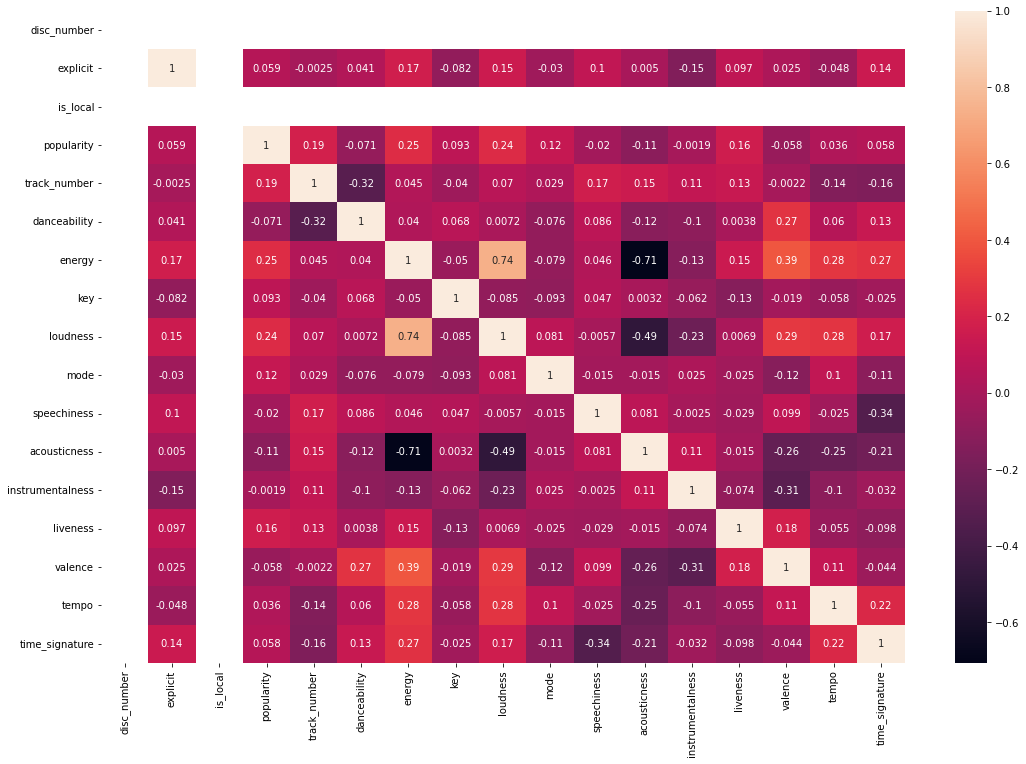

In [69]:
corrMatrix = df.corr()
#print (corrMatrix)
plt.figure(figsize = (18,12))
sn.heatmap(corrMatrix, annot=True);
plt.show();

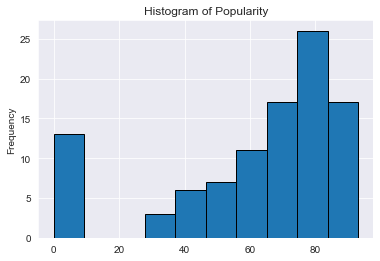

In [70]:
sn.set_style("darkgrid")
df["popularity"].plot.hist(bins=10, title= "Histogram of Popularity", edgecolor = "black");

In [76]:
pop = df.loc[df["popularity"] > 85]  #get popular songs dataframe
pop.describe() #statistics for popular songs

,disc_number,popularity,track_number,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,11.0,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000
mean,1.0,88.909091,4.454545,0.529909,0.456818,6.181818,-8.547182,0.636364,0.042973,0.567145,0.100256,0.152664,0.228209,119.975727,3.909091
std,0.0,2.467977,3.804304,0.109415,0.175342,2.857208,2.832564,0.504525,0.020859,0.405540,0.205290,0.161908,0.124117,19.120595,0.301511
min,1.0,86.000000,1.000000,0.351000,0.225000,2.000000,-14.454000,0.000000,0.026800,0.049500,0.000000,0.083300,0.082300,85.012000,3.000000
25%,1.0,87.000000,2.000000,0.447000,0.332500,4.000000,-9.487500,0.000000,0.032550,0.081600,0.000002,0.094700,0.125500,117.607000,4.000000
50%,1.0,88.000000,3.000000,0.544000,0.431000,5.000000,-8.810000,1.000000,0.033600,0.768000,0.000017,0.106000,0.212000,122.769000,4.000000
75%,1.0,91.000000,6.000000,0.600000,0.561000,9.000000,-7.089500,1.000000,0.045000,0.912000,0.083350,0.116000,0.334000,131.081500,4.000000
max,1.0,93.000000,14.000000,0.704000,0.807000,10.000000,-2.810000,1.000000,0.099400,0.969000,0.657000,0.639000,0.417000,143.875000,4.000000


In [79]:
non_pop = df.loc[df["popularity"] < 85]  #get non popular songs dataframe
non_pop.describe() #statistics for non popular songs

,disc_number,popularity,track_number,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,87.0,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000
mean,1.0,57.068966,4.850575,0.512724,0.403851,4.896552,-9.834897,0.482759,0.052843,0.561498,0.089229,0.140797,0.289237,109.647655,3.781609
std,0.0,27.037783,5.029052,0.128698,0.189299,3.766543,3.722229,0.502599,0.041413,0.320474,0.229069,0.089674,0.178273,27.211660,0.579199
min,1.0,0.000000,1.000000,0.245000,0.046000,0.000000,-23.023000,0.000000,0.025000,0.000501,0.000000,0.060400,0.036000,65.136000,1.000000
25%,1.0,46.500000,1.000000,0.436000,0.296500,1.000000,-12.510500,0.000000,0.030900,0.235500,0.000000,0.095300,0.149000,87.286000,4.000000
50%,1.0,68.000000,3.000000,0.508000,0.369000,5.000000,-9.214000,0.000000,0.038400,0.629000,0.000026,0.111000,0.266000,111.956000,4.000000
75%,1.0,77.500000,7.000000,0.614500,0.523500,8.500000,-7.091000,1.000000,0.057750,0.854500,0.007175,0.139500,0.395000,127.480000,4.000000
max,1.0,84.000000,24.000000,0.776000,0.822000,11.000000,-3.903000,1.000000,0.254000,0.989000,0.972000,0.688000,0.835000,177.334000,5.000000


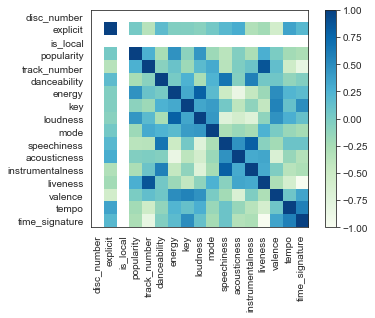

In [81]:
sn.set_style("white")
corrs = pop.corr()
plt.imshow(corrs, cmap="GnBu", vmin = -1, vmax = 1)
plt.colorbar()
plt.xticks(range(len(corrs)),corrs.columns, rotation=90)
plt.yticks(range(len(corrs)),corrs.index)
plt.show()

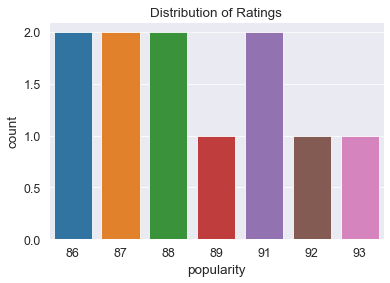

In [83]:
from matplotlib import cm
pop = df.loc[df["popularity"] > 85]

sn.set_style("darkgrid")
sn.set_context("paper",font_scale = 1.4)
sn.countplot(x = pop["popularity"]).set_title('Distribution of Ratings');

In [85]:
pop = pop.drop(["name", "popularity"], axis=1)

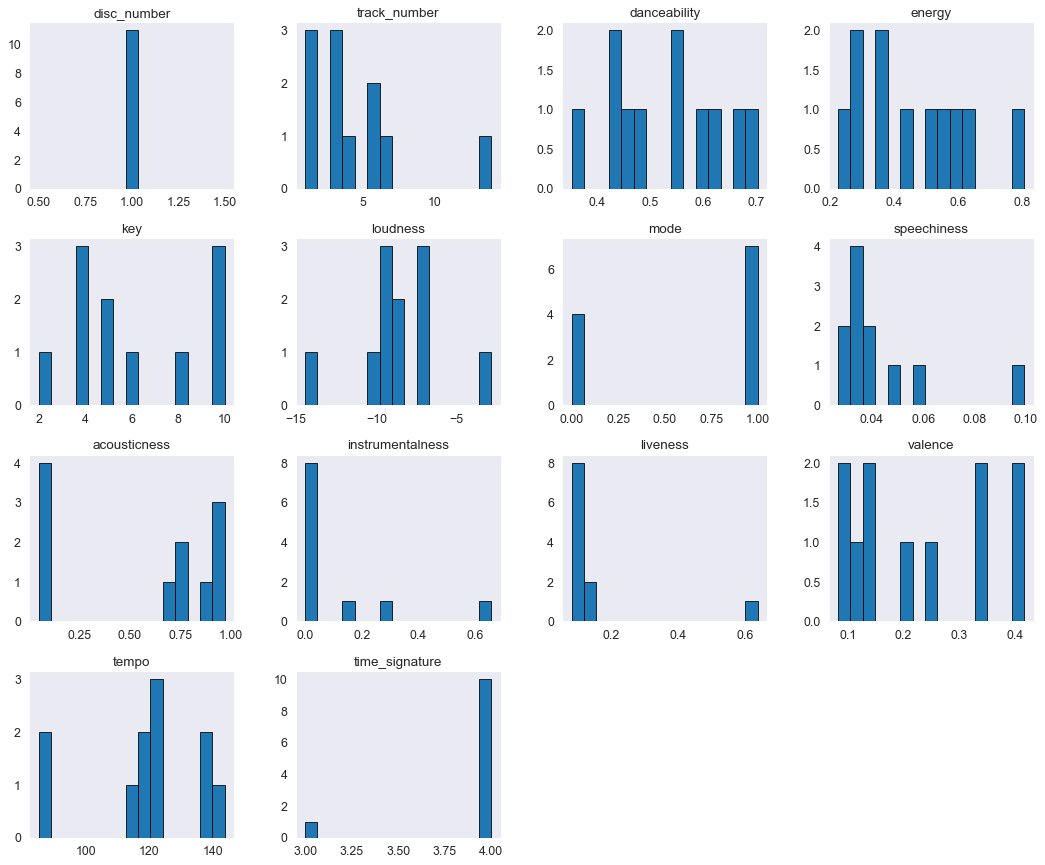

In [86]:
sn.set_style("dark")
pop.hist(bins=15, figsize=(18, 15), grid = False, edgecolor = 'black');

In [45]:
df.to_csv("myPlaylist_cs210.csv", sep = ',')